In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [113]:
df = pd.read_csv('datasets/titanic/train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.05,NaN,S
492,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.50,C30,S
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.50,NaN,S
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.75,NaN,Q
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.95,NaN,Q


In [114]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [115]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
833,0,3,male,23.0,0,0,7.8542,S
156,1,3,female,16.0,0,0,7.7333,Q
501,0,3,female,21.0,0,0,7.7500,Q
267,1,3,male,25.0,1,0,7.7750,S
810,0,3,male,26.0,0,0,7.8875,S


In [116]:
df.isnull().sum().sort_values(ascending=False)

Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [117]:
# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [118]:
df.isnull().sum().sort_values(ascending=False)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

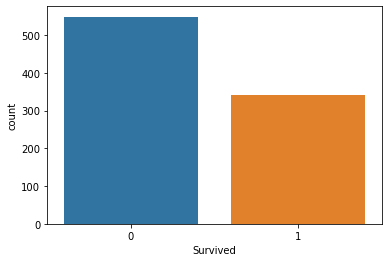

In [119]:
sns.countplot(x='Survived', data=df)

<AxesSubplot:>

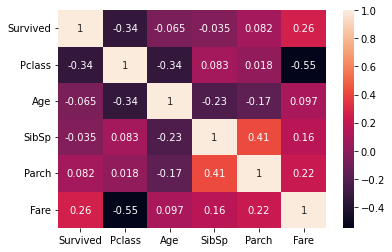

In [120]:
sns.heatmap(df.corr(), annot=True)

In [121]:
# Convert categorical variables to numeric
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df["Sex"] = labelencoder.fit_transform(df["Sex"])
df["Embarked"] = labelencoder.fit_transform(df["Embarked"])

df.sample(5)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
14,0,3,0,14.0,0,0,7.8542,2
712,1,1,1,48.0,1,0,52.0000,2
870,0,3,1,26.0,0,0,7.8958,2
300,1,3,0,28.0,0,0,7.7500,1
889,1,1,1,26.0,0,0,30.0000,0


<AxesSubplot:>

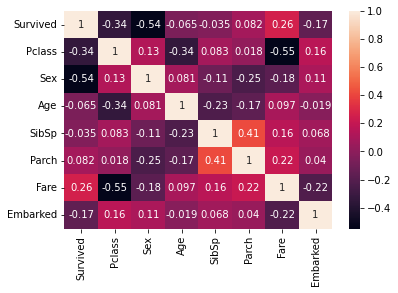

In [122]:
sns.heatmap(df.corr(), annot=True)

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# train model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [124]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [125]:
# score model
model.score(x_test, y_test)

0.8212290502793296

In [126]:
# predict
y_pred = model.predict(x_test)


<AxesSubplot:>

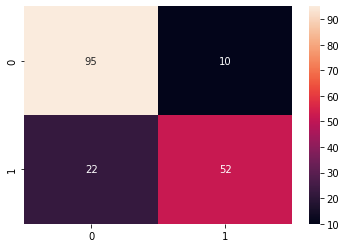

In [127]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [133]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='liblinear',
    random_state=1,
    max_iter=100
)

# train model
lr.fit(x_train, y_train)

# score model
lr.score(x_test, y_test)

# predict
y_pred = lr.predict(x_test)


<AxesSubplot:>

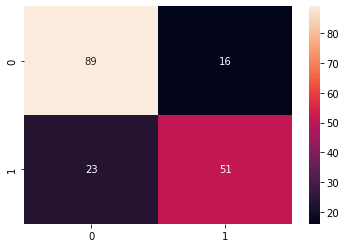

In [134]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [96]:
df_test = pd.read_csv('datasets/titanic/test.csv')
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
369,1261,2,"Pallas y Castello, Mr. Emilio",male,29.0,0,0,SC/PARIS 2147,13.8583,NaN,C
289,1181,3,"Ford, Mr. Arthur",male,NaN,0,0,A/5 1478,8.0500,NaN,S
355,1247,1,"Julian, Mr. Henry Forbes",male,50.0,0,0,113044,26.0000,E60,S
384,1276,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [97]:
df_test_id = df_test['PassengerId']
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_test.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,1,female,76.0,1,0,78.8500,S
376,3,female,22.0,2,0,8.6625,S
126,3,male,22.0,0,0,7.7958,S
162,2,female,26.0,0,0,13.5000,S
254,3,male,32.5,0,0,9.5000,S


In [98]:
df_test.isnull().sum().sort_values(ascending=False)

Age         86
Fare         1
Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [99]:
# Fill missing values
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

df_test.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
125,3,female,17.0,0,1,16.1000,S
222,2,female,22.0,0,0,10.5000,S
271,3,male,27.0,0,0,7.7500,Q
161,3,male,7.0,1,1,15.2458,C
198,2,male,23.0,0,0,10.5000,S


In [100]:
df_test["Sex"] = labelencoder.fit_transform(df_test["Sex"])
df_test["Embarked"] = labelencoder.fit_transform(df_test["Embarked"])

In [101]:
df_test.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
249,3,0,27.0,1,0,14.4542,0
387,2,1,57.0,0,0,13.0000,2
298,1,1,30.0,0,0,45.5000,2
181,1,1,37.0,1,1,83.1583,0
246,2,0,22.0,0,0,21.0000,2


In [102]:
result = model.predict(df_test)

In [103]:
# create submission file
submission = pd.DataFrame({
        "PassengerId": df_test_id,
        "Survived": result
    })
    

In [104]:
# feature importance
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances



,importance
feature,
Sex,0.479
Fare,0.166
Pclass,0.132
Age,0.105
SibSp,0.042
Parch,0.040
Embarked,0.036


<AxesSubplot:xlabel='feature'>

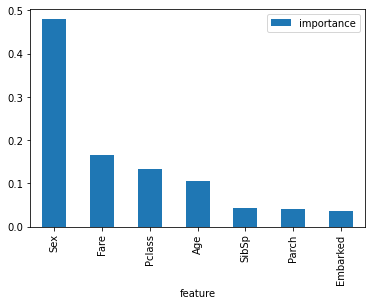

In [105]:
# plot feature importance
importances.plot.bar()


In [72]:
# train again with new data
df = pd.read_csv('datasets/titanic/train.csv')
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Embarked', 'Fare'], axis=1)
df.sample(5)

,Survived,Pclass,Sex,Age
794,0,3,male,25.0
674,0,2,male,NaN
29,0,3,male,NaN
439,0,2,male,31.0
641,1,1,female,24.0


In [73]:
# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())


In [74]:
# encode categorical variables
df['Sex'] = labelencoder.fit_transform(df['Sex'])

In [75]:
# split data into train and test
x = df.drop('Survived', axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# train model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x_train, y_train)


RandomForestClassifier(max_depth=5, random_state=1)

In [76]:
# score model
model.score(x_test, y_test)

0.7988826815642458

<AxesSubplot:>

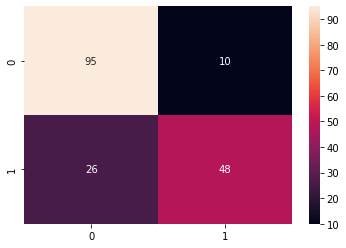

In [77]:
# confusion matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [78]:
# feature importance
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Sex,0.542
Age,0.244
Pclass,0.214


<AxesSubplot:xlabel='feature'>

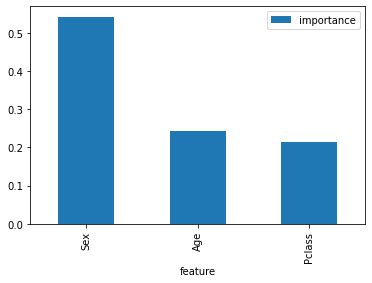

In [79]:
# plot feature importance
importances.plot.bar()

# Conclusions
Best 